In [1]:
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt

In [55]:
logo = plt.imread('ddg.png').astype('float32')
banner = plt.imread('isbl_3360x840.34178053_kpb3y5kr.jpg').astype('float32')
banner /= 255

In [58]:
c00 = np.array((382, 254), dtype='float32')
c10 = np.array((1429, 71), dtype='float32')
c11 = np.array((1535, 448), dtype='float32')
c01 = np.array((620, 607), dtype='float32')

In [61]:
nx = 2000
ny = 1000

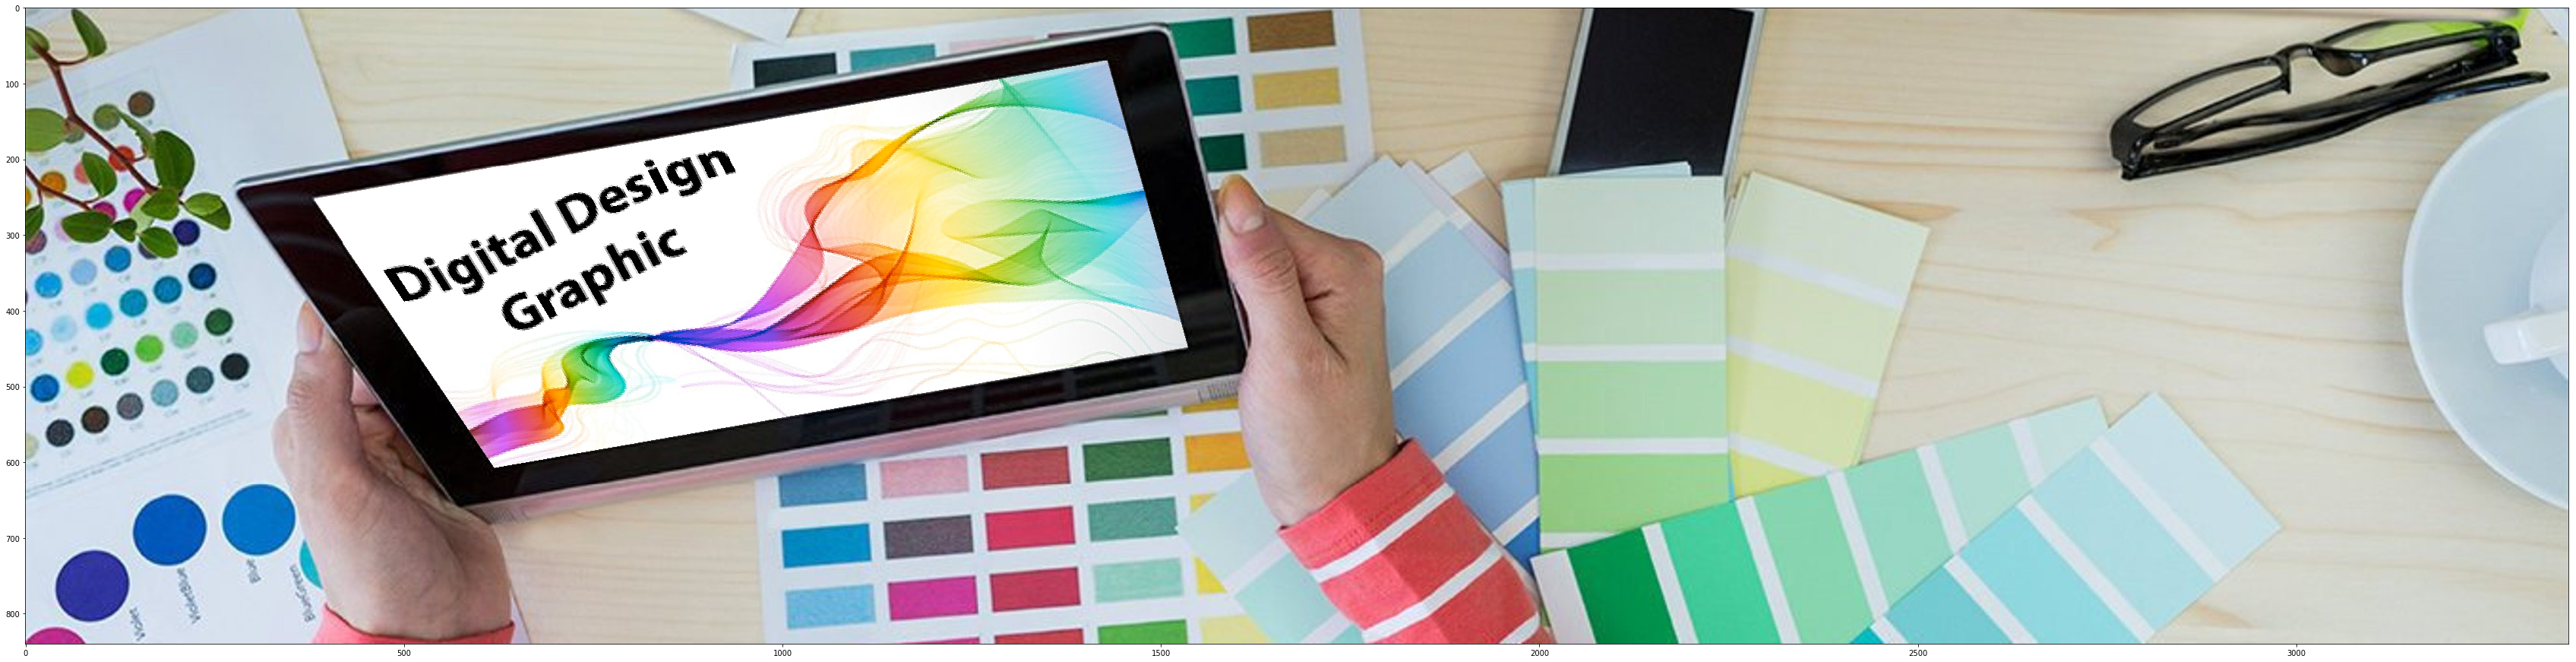

In [63]:
b2 = banner.copy()

uv = np.empty(2, dtype='float32')
logo_max = np.array([logo.shape[1], logo.shape[0]], dtype='float32') - 1

for fy in np.linspace(0, 1, ny, dtype='float32'):
    p1 = c00 * (1 - fy) + c01 * fy
    p2 = c10 * (1 - fy) + c11 * fy
    for fx in np.linspace(0, 1, nx, dtype='float32'):
        uv[0] = fx
        uv[1] = fy
        src_loc = (uv * logo_max).astype('int32')
        dst_loc = (p1 * (1 - fx) + p2 * fx).astype('int32')
        
        #before = b2[dst_loc[1], dst_loc[0], 0:3].copy()
        c = logo[src_loc[1], src_loc[0], 0:3]
        b2[dst_loc[1], dst_loc[0], 0:3] = c
        #after = b2[dst_loc[1], dst_loc[0], 0:3].copy()
        #print(before, after)
        
        
plt.figure(figsize=(60, 60))
plt.imshow(b2)
plt.imsave('banner.png', b2)

In [56]:
banner.min(), banner.max()

(0.0, 1.0)

In [57]:
logo.min(), logo.max()

(0.0, 1.0)